In [1]:
TrainingImagePath="C:\\Users\HP\Desktop\Tech. sminars\TS2--Comp.Vision\Train_data"

In [2]:
validationImagePath="C:\\Users\HP\Desktop\Tech. sminars\TS2--Comp.Vision\Test_data"

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# Creating base model 1 (3 hidden layers)

In [4]:
#Base Model

train_datagen=ImageDataGenerator(rescale=1./225)
test_datagen=ImageDataGenerator(rescale=1./225)

In [5]:
# Generating the Training Data

training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                 target_size=(64, 64),
                                                 batch_size=20,
                                                 class_mode='categorical')

Found 75 images belonging to 5 classes.


In [6]:
# Generating the Validation Data

validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                  target_size=(64, 64),
                                                  batch_size=20,
                                                  class_mode='categorical')

Found 25 images belonging to 5 classes.


In [7]:
#_Create CNN deep learning model
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [8]:
#Initializing the Convolutional Neural Network

classifier=Sequential()

In [9]:
#STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red,Green and Blue components of pixels

In [10]:
classifier.add(Convolution2D(32, kernel_size=(3, 3),
                             input_shape=(64,64,3), activation='relu')) 

In [11]:
# STEP--2 MAX Pooling'''

classifier.add(MaxPool2D(pool_size=(2,2)))

In [12]:
#_ ADDITIONAL LAYER of CONVOLUTION for better accuracy '''

classifier.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))

In [13]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [14]:
#_ ADDITIONAL LAYER of CONVOLUTION for better accuracy '''

classifier.add(Convolution2D(64, kernel_size=(3, 3), activation='relu')) 

In [15]:
# STEP--3 FLattening'''

classifier.add(Flatten()) 

In [16]:
# STEP--4 Fully Connected Neural Network'''

classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(5, activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [17]:
#Compiling the CNN

classifier.compile(loss='categorical_crossentropy',
                   optimizer='adam', metrics=['accuracy'])

# Training the base model

In [18]:
# Starting the model training
history = classifier.fit_generator(training_set, epochs=20, 
                         validation_data=validation_set)

C:\Users\HP\AppData\Local\Temp/ipykernel_4488/174919611.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs=20,


Epoch 1/20
4/4 [==============================] - 151s 42s/step - loss: 1.7824 - accuracy: 0.1867 - val_loss: 1.6126 - val_accuracy: 0.3200
Epoch 2/20
4/4 [==============================] - 119s 32s/step - loss: 1.5958 - accuracy: 0.3067 - val_loss: 1.6045 - val_accuracy: 0.2800
Epoch 3/20
4/4 [==============================] - 119s 34s/step - loss: 1.5715 - accuracy: 0.4133 - val_loss: 1.5979 - val_accuracy: 0.3600
Epoch 4/20
4/4 [==============================] - 135s 37s/step - loss: 1.5115 - accuracy: 0.3733 - val_loss: 1.5984 - val_accuracy: 0.3200
Epoch 5/20
4/4 [==============================] - 143s 41s/step - loss: 1.4379 - accuracy: 0.4933 - val_loss: 1.6265 - val_accuracy: 0.3200
Epoch 6/20
4/4 [==============================] - 140s 36s/step - loss: 1.2737 - accuracy: 0.4000 - val_loss: 1.7021 - val_accuracy: 0.4000
Epoch 7/20
4/4 [==============================] - 129s 34s/step - loss: 1.1215 - accuracy: 0.6000 - val_loss: 1.9323 - val_accuracy: 0.2400
Epoch 8/20
4/4 [====

In [19]:
#Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [20]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

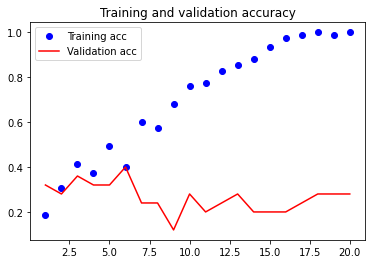

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

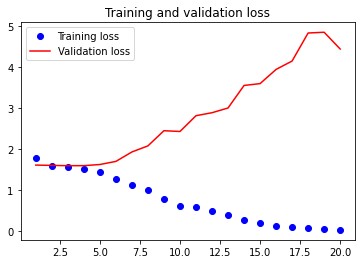

In [22]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Creating model 2(4 hidden layers)

In [23]:
# Specifying the location of images 

TrainingImagePath="C:\\Users\HP\Desktop\Tech. sminars\TS2--Comp.Vision\Train_data"
validationImagePath="C:\\Users\HP\Desktop\Tech. sminars\TS2--Comp.Vision\Test_data"

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
#Adding parameters in the ImageDatagenerator(creating more images using parameters)

train_datagen = ImageDataGenerator(rescale=1./225, shear_range=0.5, 
                                   zoom_range=0.5, width_shift_range=0.2,
                                   height_shift_range=0.2)

In [26]:
# No transformations are done on the testing images

test_datagen = ImageDataGenerator(rescale=1./225)

In [27]:
# Generating the Training Data

training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                 target_size=(64, 64),
                                                 batch_size=20,
                                                 class_mode='categorical')

Found 75 images belonging to 5 classes.


In [28]:
# Generating the Validation Data

validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                  target_size=(64, 64),
                                                  batch_size=20,
                                                  class_mode='categorical')

Found 25 images belonging to 5 classes.


In [29]:
#__Create CNN deep learning model
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [30]:
#Initializing the Convolutional Neural Network

classifier=Sequential()

In [31]:
#Convolution
classifier.add(Convolution2D(32, kernel_size=(3,3),
                            input_shape=(64,64,3), activation='relu'))

In [32]:
#Max polling
classifier.add(MaxPool2D(pool_size=(2,2)))

In [33]:
#ADDITIONAL LAYER of CONVOLUTION for better accuracy 
classifier.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))

In [34]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [35]:
#ADDITIONAL LAYER of CONVOLUTION for better accuracy 
classifier.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))

In [36]:
#Flattening
classifier.add(Flatten())

In [37]:
#Fully Connected Neural Network
classifier.add(Dense(64, activation='relu')) # hidden layer

In [38]:
classifier.add(Dense(5, activation='softmax')) # output layer

In [39]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 9216)             

In [40]:
#Compiler
classifier.compile(loss='categorical_crossentropy', 
                   optimizer = 'adam', metrics=["accuracy"])

# Training 2nd model

In [42]:
# Starting the model training

history = classifier.fit_generator(training_set, epochs=100, 
                         validation_data=validation_set)

C:\Users\HP\AppData\Local\Temp/ipykernel_4488/2176159273.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs=100,


Epoch 1/100
4/4 [==============================] - 270s 76s/step - loss: 1.6808 - accuracy: 0.1867 - val_loss: 1.6112 - val_accuracy: 0.1600
Epoch 2/100
4/4 [==============================] - 236s 61s/step - loss: 1.6152 - accuracy: 0.2133 - val_loss: 1.6127 - val_accuracy: 0.2400
Epoch 3/100
4/4 [==============================] - 258s 67s/step - loss: 1.6009 - accuracy: 0.3067 - val_loss: 1.6108 - val_accuracy: 0.1600
Epoch 4/100
4/4 [==============================] - 219s 61s/step - loss: 1.5950 - accuracy: 0.2533 - val_loss: 1.6082 - val_accuracy: 0.2400
Epoch 5/100
4/4 [==============================] - 195s 54s/step - loss: 1.5666 - accuracy: 0.3600 - val_loss: 1.5946 - val_accuracy: 0.4000
Epoch 6/100
4/4 [==============================] - 134s 33s/step - loss: 1.5224 - accuracy: 0.4133 - val_loss: 1.5882 - val_accuracy: 0.3600
Epoch 7/100
4/4 [==============================] - 128s 33s/step - loss: 1.4700 - accuracy: 0.4000 - val_loss: 1.6219 - val_accuracy: 0.3200
Epoch 8/100
4

In [43]:
#Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [44]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

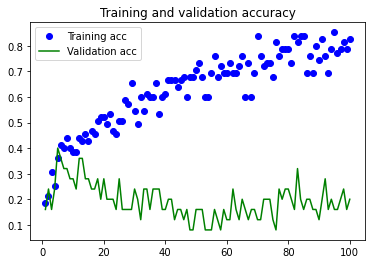

<Figure size 432x288 with 0 Axes>

In [45]:
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

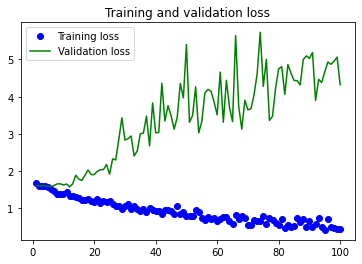

In [46]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Trial on a pretrained model(VGG16- Visual Geometric Group 16)

In [47]:
# Model 3
#_Pretrained model called VGG16

In [48]:
#Instantiating of the VGG16 convolutional base
# ImageNet dataset (1.4 million labeled images and 1,000 different classes
from keras.applications import VGG16

In [49]:
conv_base = VGG16(weights='imagenet', include_top=False,
                  input_shape=(150, 150, 3))

In [50]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [51]:
#Extracting features and using the pretrained convolutional base

import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [52]:
# Specifying the location of the folder where images are present
TrainingImagePath="C:\\Users\HP\Desktop\Tech. sminars\TS2--Comp.Vision\Train_data"
validationImagePath="C:\\Users\HP\Desktop\Tech. sminars\TS2--Comp.Vision\Test_data"

In [53]:
datagen = ImageDataGenerator(rescale=1./255)

In [54]:
batch_size = 20

In [55]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [56]:
#Note that because generators yield data indefinitely in a loop, you must break after every image has been seen once.

In [59]:
#Following three codes takes few minutes each as it is converting images into
#arrays
train_features, train_labels = extract_features(TrainingImagePath, 75)

Found 75 images belonging to 5 classes.
1/1 [==============================] - 11s 11s/step


In [60]:
validation_features, validation_labels = extract_features(validationImagePath, 25)

Found 25 images belonging to 5 classes.
1/1 [==============================] - 3s 3s/step


In [61]:
train_features.shape

(75, 4, 4, 512)

In [63]:
train_features = np.reshape(train_features, (75, 4*4* 512))

In [64]:
train_features.shape 

(75, 8192)

In [65]:
validation_features.shape

(25, 4, 4, 512)

In [66]:
validation_features = np.reshape(validation_features, (25, 4*4* 512))

In [67]:
validation_features.shape 

(25, 8192)

In [68]:
#Preparing the response data
train_labels.shape

(75,)

In [69]:
from keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels)
train_labels_cat.shape

(75, 5)

In [70]:
validation_labels.shape

(25,)

In [71]:
valid_labels_cat = to_categorical(validation_labels)
valid_labels_cat.shape

(25, 5)

In [72]:
#Defining and training the densely connected classifier

from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [73]:
history = model.fit(train_features, train_labels_cat,epochs=30,batch_size=20,
                    validation_data=(validation_features, valid_labels_cat))

Epoch 1/30
4/4 [==============================] - 3s 223ms/step - loss: 2.2461 - acc: 0.2533 - val_loss: 1.7578 - val_acc: 0.3200
Epoch 2/30
4/4 [==============================] - 0s 73ms/step - loss: 1.2468 - acc: 0.5200 - val_loss: 1.4944 - val_acc: 0.3600
Epoch 3/30
4/4 [==============================] - 0s 71ms/step - loss: 0.6665 - acc: 0.7733 - val_loss: 1.2522 - val_acc: 0.6400
Epoch 4/30
4/4 [==============================] - 0s 68ms/step - loss: 0.3455 - acc: 0.8533 - val_loss: 1.2809 - val_acc: 0.5600
Epoch 5/30
4/4 [==============================] - 0s 67ms/step - loss: 0.2506 - acc: 0.9467 - val_loss: 1.0735 - val_acc: 0.6800
Epoch 6/30
4/4 [==============================] - 0s 92ms/step - loss: 0.1916 - acc: 0.9600 - val_loss: 1.3892 - val_acc: 0.4000
Epoch 7/30
4/4 [==============================] - 0s 81ms/step - loss: 0.1401 - acc: 0.9333 - val_loss: 1.0510 - val_acc: 0.6000
Epoch 8/30
4/4 [==============================] - 0s 83ms/step - loss: 0.0813 - acc: 0.9600 - va

In [74]:
#Plotting the results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [75]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

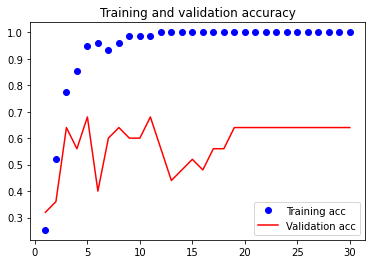

<Figure size 432x288 with 0 Axes>

In [76]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

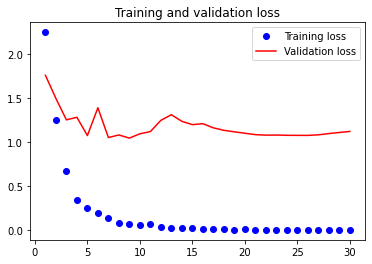

In [77]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()